# Testes e aprendizado

In [2]:
import numpy as np
import healpy as hp
import astropy.io.fits as pyfits
import os
import matplotlib.pyplot as plt
import gmca4im_lib2 as g4i

import pys2let as pys2

In [31]:
nside = 256 #número de sítios
npix = hp.nside2npix(nside) #número de pixels
npix

786432

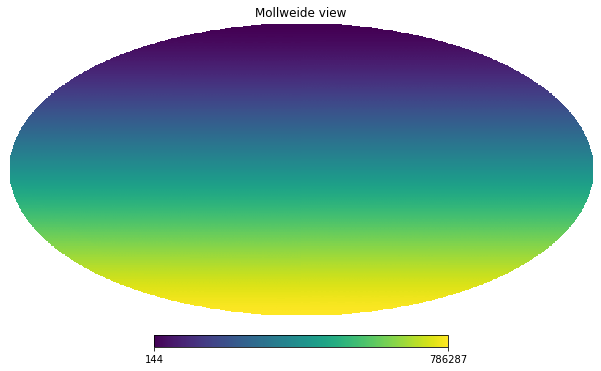

In [32]:
vec = np.arange(npix) #vetor usado para construir o mapa
hp.mollview(vec) #mapa

### Criar e checar arquivo fits

In [54]:
path = "/home/gasper_ju/Documents/Física/IC/Astro" # construção do caminho para ler arquivo que contém o mapa
os.listdir(path) #mostra todos os arquivos desse local
dir = os.listdir(path) #guarda
dir[-4] #definiu localização do arquivo desejado

'Cube_5PSM_L10_RS.fits'

In [55]:
path = os.path.join(path,dir[-4]) #concatenou informações da localização do arquivo para manipulação
path

'/home/gasper_ju/Documents/Física/IC/Astro/Cube_5PSM_L10_RS.fits'

In [56]:
os.getcwd() #comando para mostrar atual localização no terminal

'/home/gasper_ju/Documents/Física/IC/Astro'

In [57]:
hdu = pyfits.open(path) #cria um arquivo tipo fits e guarda-lo, utilizando a localização definida

In [58]:
hdu.info() #lê o arquivo fits

Filename: /home/gasper_ju/Documents/Física/IC/Astro/Cube_5PSM_L10_RS.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (786432, 30)   float64   


In [59]:
with pyfits.open(path) as hdu:
    maps = hdu[0].data #loop para criar os mapas a partir do arquivo fits item 0, de forma a fechar o arquivo depois da leitura

### Leitura mapa e interpretação

In [60]:
np.shape(maps) #mostra quantos mapas tem e quantos pixels (?)

(30, 786432)

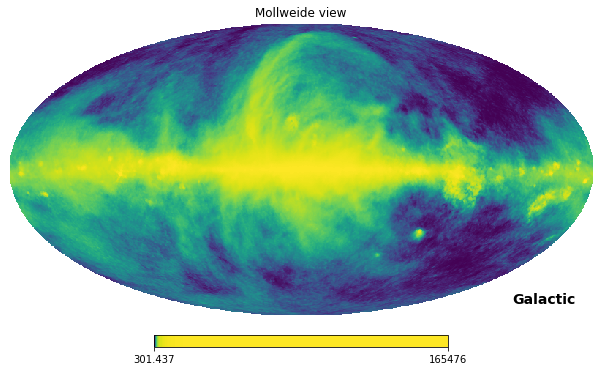

In [61]:
hp.mollview(maps[9,:],norm = "hist", coord = ["C","G"]) #vizualização de um dos mapas, norma para melhor vizualização e rotação vizual do mapa

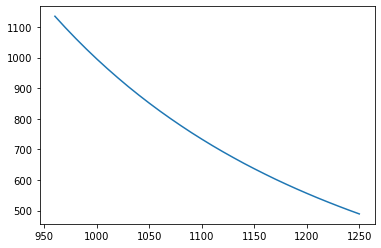

In [62]:
plt.plot(np.arange(960, 1260, 10),maps[:,1000]) #plot da intensidade por temperatura do forground

### Criar arquivo fits e checagem para mapa de 21 cm

In [64]:
path2 = "/home/gasper_ju/Documents/Física/IC/Astro"
tr = os.listdir(path2)
tr[3] #mesmo procedimento para outro arquivo tipo fits

'Cube_21_Smooth_L10.fits'

In [65]:
path2 = os.path.join(path2, tr[3])
path2

'/home/gasper_ju/Documents/Física/IC/Astro/Cube_21_Smooth_L10.fits'

In [66]:
with pyfits.open(path2) as hdu:
    maps21 = hdu[0].data

### Leitura e interpretação mapa de 21 cm

/home/gasper_ju/.local/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/gasper_ju/.local/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/gasper_ju/.local/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify

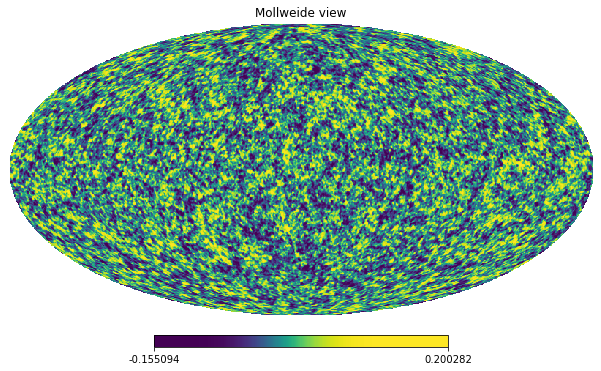

In [67]:
hp.mollview(maps21[12,:], norm = "hist")

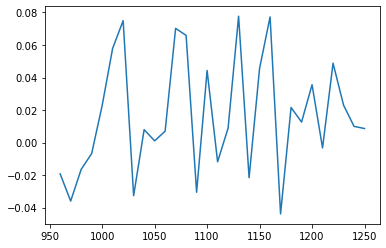

In [68]:
plt.plot(np.arange(960, 1260, 10),maps21[:,1000]) #plot intensidade e temperatura para o 21 cm

### Comparação entre as informações dos mapas (coeficientes de correlação)

In [69]:
cl21 = hp.anafast(maps21[12])
cl = hp.anafast(maps[12]) # calcula a correlção entre os mapas: foreground e 21 cm separadamente

In [70]:
l = np.arange(len(cl)) #não precisa
fator = l*(l+1)/(2*np.pi) #fator de potência (somente para variações nos pixeis)

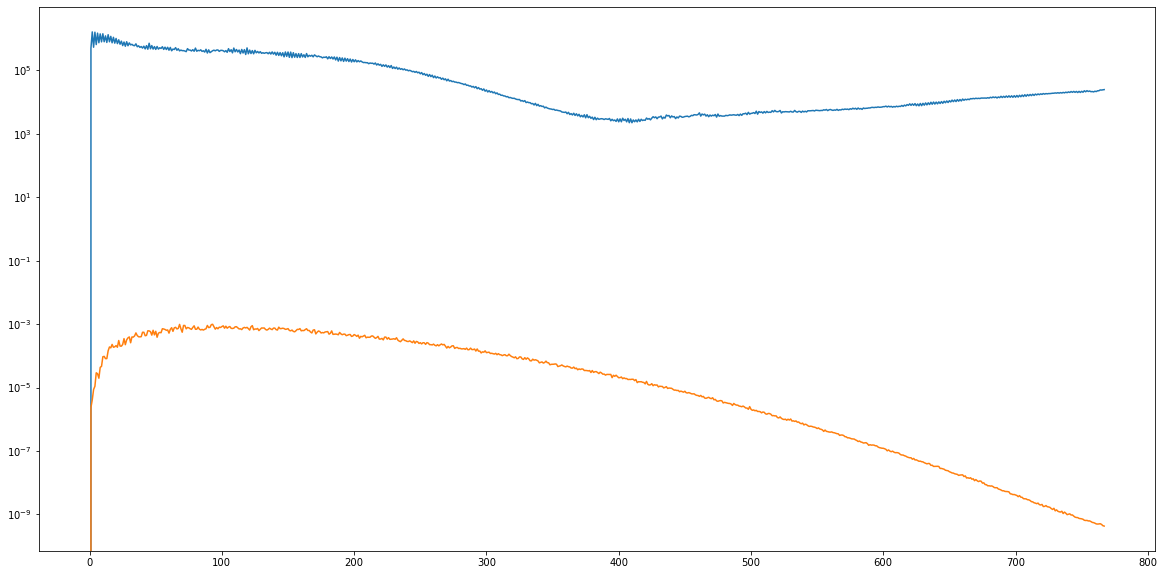

In [71]:
plt.figure(figsize = (20, 10))
plt.plot(l, fator*cl)
plt.plot(l, fator*cl21)
plt.yscale("log") #plot dos dados de intensidade correlacioandos (?)

### Exercício arquivo fits

In [16]:
 from astropy.io import fits #qual a diferença entre essa importação e a de cima?

In [39]:
quant = np.arange(103.0) #determina quantidade de casas de informação de imagem
hdu3 = fits.PrimaryHDU(quant) #cria o "cabeçalho" do objeto HDU, que uma "componente" do arquivo fits, com o tamanho desejado
hdul = fits.HDUList([hdu3]) #transforma o HDU que criamos em uma lista do tipo fits
hdul.writeto('new1.fits') #trasforma a lista em uma arquivo fits

In [22]:
hdu3.writeto('new2.fits') #sintetiza todos os passos acima

In [45]:
hdu3.writeto('new3.fits') #teste com outro tamanho para ter certeza que estava dando certo -> tamanho 103

#### Checando arquivos

In [54]:
track = "/home/gasper_ju/Documents/Física/IC/Astro" # construção do caminho para ler arquivo que contém o mapa
os.listdir(track) #mostra todos os arquivos desse local
point = os.listdir(track) #guarda
point[-1]

'new2.fits'

In [55]:
track = os.path.join(track, point[-1])
track

'/home/gasper_ju/Documents/Física/IC/Astro/new2.fits'

In [56]:
hdu = pyfits.open(track)

In [57]:
hdu.info()

Filename: /home/gasper_ju/Documents/Física/IC/Astro/new2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (100,)   float64   


# Pré-teste com um único mapa

## Decomposição de mapas usando axisym_hpx do S2let

#### axisym_hpx (TESTE sem cubo)

In [ ]:
### -> L com *0.5 e B = 1.2 aumenta muito a var
### -> quanto maior B, mais rápido (menor info matriz); L pequeno, aumenta o erro e a var. Então L tem de ser maior, mas o máx é 3.
### -> aumentando para 1000 o B (aumentando), aparentemente o var muda... mas isso seria esperado, por conta da diminuição de info, certo? (quando L=3*nseed, parece q vai qq B grande)

In [19]:
#hp.map2alm? -> lmax, razão do -1

In [25]:
#Máscara
fnome = "/home/gasper_ju/Documents/Física/IC/Astro/Mask_tot.fits"
hdu = pyfits.open(fnome)
hdu.info()
with pyfits.open(fnome) as hdu: #abriu arquivo fits 
    mask = hdu[0].data
np.shape(mask)

Filename: /home/gasper_ju/Documents/Física/IC/Astro/Mask_tot.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (786432,)   float64   


(786432,)

In [3]:
fname = "/home/gasper_ju/Documents/Física/IC/Astro/Cube_5PSM_L10_RS.fits" #arquivo (foreground + 21cm)
fnome = "/home/gasper_ju/Documents/Física/IC/Astro/Mask_tot.fits" #máscara

with pyfits.open(fname) as hdu: #abriu arquivo fits 
    maps = hdu[0].data
    
with pyfits.open(fnome) as hdu: #abriu arquivo fits 
    mask = hdu[0].data
    
f_ini = maps[3]*mask

nside = hp.npix2nside(f_ini.size) #numero de pixels
L = 3*hp.npix2nside(f_ini.size) #número de interações(3)? -> influciou na resolução (sem -1 melhor) -> com -1 (tecnica deles), piorou (4 estoura) -> não tem muita diferente de 4* e 3*
J_min = 1 #8 parece que é o max, e, diminuiu a quant de wavelet quando aumenta J_min -> tem de ser um inteiro positivo
B = 3 #menos mapas, se aumenta (não pode 1) -> 1.1 é negativo na caixa 4 -> aparentemente o mínimo é 1.2
J_max = pys2.pys2let_j_max(B, L, J_min) #é o equivalente ao s2let_j_max

f_lm = hp.map2alm(f_ini, lmax=L - 1)  # Its alms

f_wav_lm, f_scal_lm = pys2.analysis_axisym_lm_wav(f_lm, B, L, J_min) #olhar esse código!

# Reconstruct healpix maps on the sphere and plot them
f_scal = hp.alm2map(f_scal_lm, nside=nside, lmax=L - 1) #coeficiente escalar
f_wav = np.empty([12 * nside * nside, J_max - J_min + 1]) #coeficiente wavelet
for j in range(J_max - J_min + 1):
    flm = f_wav_lm[:, j].ravel()
    f_wav[:, j] = hp.alm2map(flm, nside=nside, lmax=L - 1)

/home/gasper_ju/.local/lib/python3.9/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/home/gasper_ju/.local/lib/python3.9/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(


In [4]:
np.shape(f_wav.T),np.shape(f_scal),np.shape(maps[3])

((7, 786432), (786432,), (786432,))

In [5]:
c = np.vstack((f_wav.T, f_scal)) #formatação para eu plota um dos mapas

/home/gasper_ju/.local/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/gasper_ju/.local/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/gasper_ju/.local/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify

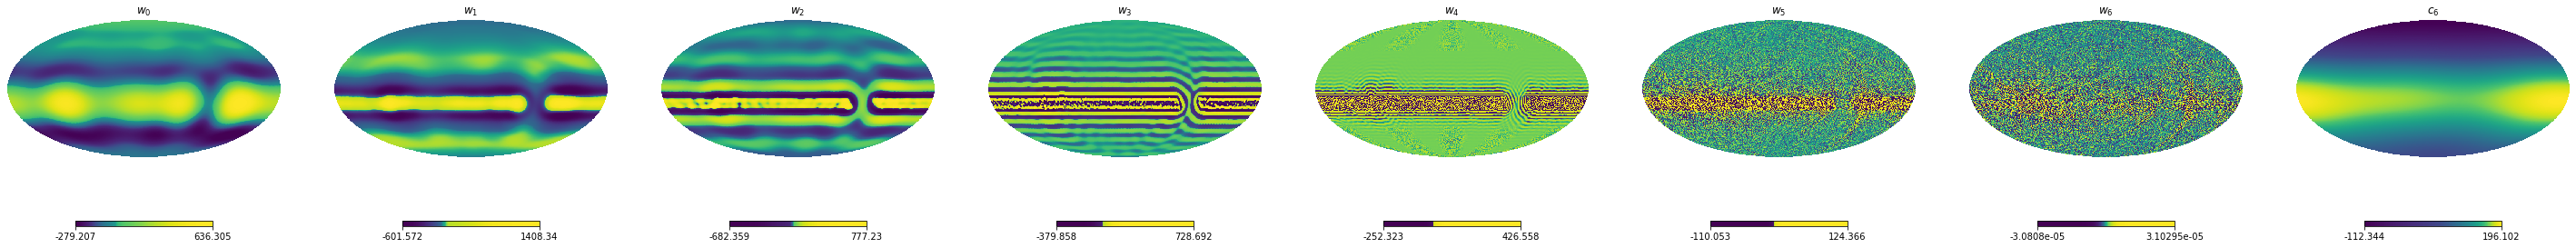

In [6]:
plt.figure(figsize=(40,20))
names = np.hstack((["w_{}".format(i) for i in range(np.shape(c)[0]-1)],["c_{}".format(J_max-1)]))
for i in range(np.shape(c)[0]):
    hp.mollview(c[i], sub=(1,np.shape(c)[0],i+1), norm="hist", title="${}$".format(names[i]))

<ipython-input-7-8333e7f23093>:4: RuntimeWarning: divide by zero encountered in true_divide
  hp.mollview((f_ini-f_rec)/(f_ini), norm="hist") #qualidade de reconstrução normalizada segundo a informação inicial em porcentagem


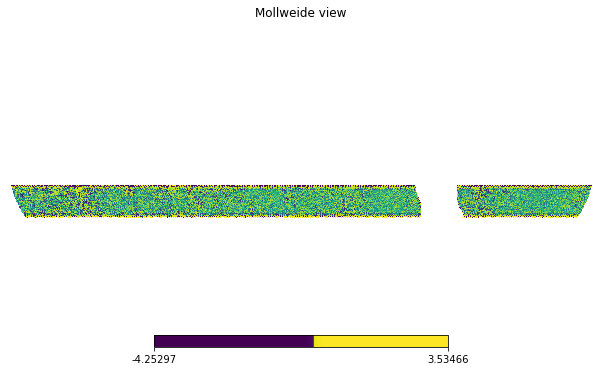

In [7]:
# Uses synthesis to reconstruct the input map.
f_lm_rec = pys2.synthesis_axisym_lm_wav(f_wav_lm, f_scal_lm, B, L, J_min)
f_rec = hp.alm2map(f_lm_rec, nside=nside, lmax=L-1)
hp.mollview((f_ini-f_rec)/(f_ini), norm="hist") #qualidade de reconstrução normalizada segundo a informação inicial em porcentagem

In [8]:
fname = "/home/gasper_ju/Documents/Física/IC/Astro/Cube_21_Smooth_L10.fits" #arquivo (foreground + 21cm)
with pyfits.open(fname) as hdu: #abriu arquivo fits 
    maps21 = hdu[0].data

In [9]:
print(np.std(f_ini-f_rec)) #variância
print(np.std(f_ini-f_rec-maps21[3]))

1.558866567465185
1.5592716468635301


*Tentativa

In [10]:
cl_ini = hp.anafast(f_ini)
cl_dif = hp.anafast(f_rec)

In [11]:
cl_ini.size/3 #max da resolução

256.0

3.132747588097118e-05

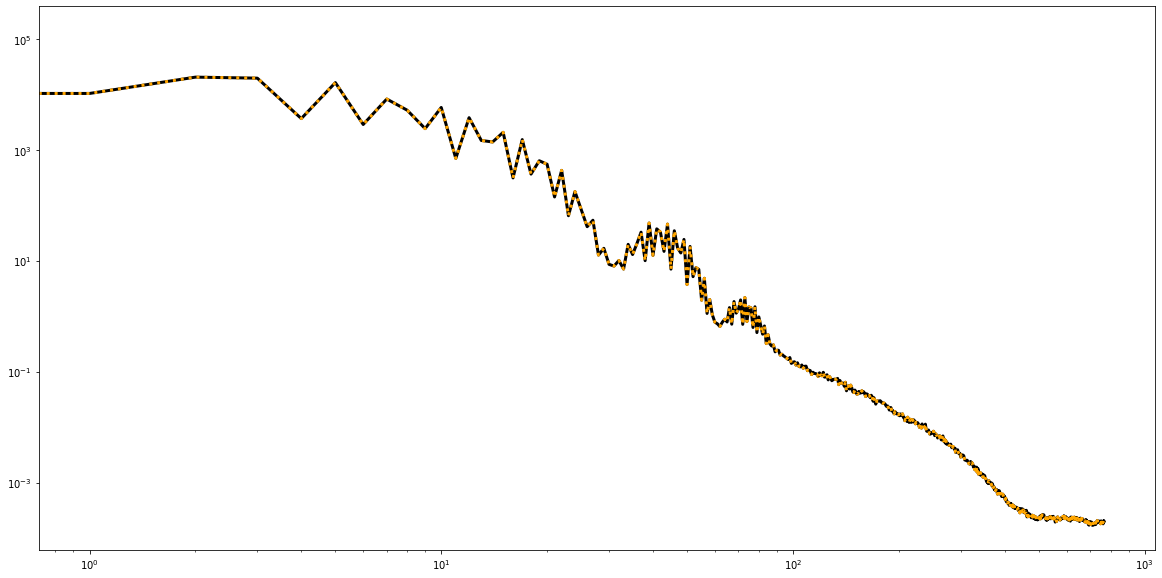

In [15]:
plt.figure(figsize = (20, 10))
plt.plot(cl_ini, color="black", linewidth=3)
plt.plot(cl_dif, color="orange", linestyle="dotted", linewidth=3)
plt.yscale("log") #plot dos dados de intensidade correlacioandos (?)
plt.xscale("log")
np.max(cl_ini-cl_dif)


# Rodando no COSMO 0

#### Código Alessandro

In [3]:
def remove_mean(map_= None): #remover média de cada mapa (no mapa observado: foreground e 21cm), todo o maps
	len_nu_ch = np.shape(map_)[0]
	map_ = np.array([[map_[i] - np.mean(map_[i],axis=0)] for i in range(len_nu_ch)])
	return map_[:,0, : ] #devolve um cubo de mapas sem valores médios -> pra simplificar o filtro (peso pra cada sinal)

In [4]:
def Include_scalar_coefs(w,c,J): 
    nbins,npix = c.shape

    for i in range(nbins):
        X = w[i].reshape(-1,J).T
        X = np.vstack((X,c[i]))
        X = X.T.flatten()
        if i==0:
            Xw_ = np.array(X)
        else:
            Xw_ = np.vstack((Xw_,X))
    return Xw_

In [5]:
def Filter(Ae=None, FG=False): #filtro em si, sem correlação
    W   = np.linalg.inv(np.dot(Ae.T,Ae))
    W   = np.dot(W,Ae.T) #Filter  
    if FG:
        return np.dot(Ae,W) #foreground filter
    else:
        return W

In [6]:
def Reconstruction_maps(X=None,Ae=None): #mapa obs (mapas), Ae é a matriz mistura (já fez todo o processo)
    X_fg = np.dot(Filter(Ae=Ae,FG=True),X)
    X_21 = X - X_fg
    return {"21cm":X_21,"foregrounds":X_fg} #ele devolve a estimativa do 21cm e do foregrounds

In [7]:
def Residual_maps(X=None,Ae=None):
    X    = Reconstruction_maps(X,Ae)
    W_fg = Filter(Ae,True)
    R_21 = X["21cm"]        - np.dot(W_fg,X["21cm"])  
    R_fg = X["foregrounds"] - np.dot(W_fg,X["foregrounds"])  
    return {"21cm":R_21, "foregrounds":R_fg}

#### axisym_hpx (TESTE com cubo)

#quando deu problema do média
for pos, i in enumerate([3, 3]):#range(maps.shape[0])
    f_ini = maps[i]

    f_lm = hp.map2alm(f_ini, lmax=L-1)  # Its alms

    f_wav_lm, f_scal_lm = pys2.analysis_axisym_lm_wav(f_lm, B, L, J_min) 

    # Reconstruct healpix maps on the sphere and plot them
    f_scal = hp.alm2map(f_scal_lm, nside=nside, lmax=L-1) #coeficiente escalar
    f_wav = np.empty([12 * nside * nside, J_max - J_min + 1]) #coeficiente wavelet
    for j in range(J_max - J_min + 1):
        flm = f_wav_lm[:, j].ravel()
        f_wav[:, j] = hp.alm2map(flm, nside=nside, lmax=L-1)
    if pos==0:
        matrix=np.vstack((f_wav.T, f_scal)).T.flatten()
    else:
        matrix=np.vstack((matrix, np.vstack((f_wav.T, f_scal)).T.flatten()))
        

In [ ]:
fname = "/home/gasper_ju/Documents/Física/IC/Astro/Cube_5PSM_L10_RS.fits" #arquivo (foreground + 21cm)
with pyfits.open(fname) as hdu: #abriu arquivo fits 
    maps = hdu[0].data
#maps = remove_mean(maps) -> por que raios? Isso quem dá o problema da reconstrução
nside = hp.npix2nside(maps.shape[1]) #numero de pixels
L = 3*nside
#L = 3*hp.npix2nside(f_ini.size)-1 #número de interações(3)? -> influciou na resolução (sem -1 melhor) -> com -1 (tecnica deles), piorou
J_min = 1
B = 3
J_max = pys2.pys2let_j_max(B, L, J_min) #é o equivalente ao s2let_j_max
matrix = np.zeros((maps.shape[0], (J_max - J_min + 2)*maps.shape[1]))

for i in range(maps.shape[0]):
    f_ini = maps[i]

    f_lm = hp.map2alm(f_ini, lmax=L - 1)  # Its alms

    f_wav_lm, f_scal_lm = pys2.analysis_axisym_lm_wav(f_lm, B, L, J_min) 

    # Reconstruct healpix maps on the sphere and plot them
    f_scal = hp.alm2map(f_scal_lm, nside=nside, lmax=L - 1) #coeficiente escalar
    f_wav = np.empty([12 * nside * nside, J_max - J_min + 1]) #coeficiente wavelet
    for j in range(J_max - J_min + 1):
        flm = f_wav_lm[:, j].ravel()
        f_wav[:, j] = hp.alm2map(flm, nside=nside, lmax=L - 1)
    matrix[i,:] = np.vstack((f_wav.T, f_scal)).T.flatten()

In [ ]:
J = J_max - J_min + 1 #número de camadas em um mapa
c = matrix[0].reshape(-1, J+1).T #formatação para eu plota um dos mapas

In [ ]:
plt.figure(figsize=(20,10))
names = np.hstack((["w_{}".format(i) for i in range(np.shape(c)[0]-1)],["c_{}".format(J-1)]))
for i in range(np.shape(c)[0]):
    hp.mollview(c[i], sub=(1,np.shape(c)[0],i+1), norm="hist", title="${}$".format(names[i]))

In [ ]:
# Uses synthesis to reconstruct the input map.
f_lm_rec = pys2.synthesis_axisym_lm_wav(f_wav_lm, f_scal_lm, B, L, J_min)
f_rec = hp.alm2map(f_lm_rec, nside=nside, lmax=L-1)
hp.mollview((f_ini-f_rec)/(f_ini), norm="hist") #qualidade de reconstrução normalizada segundo a informação inicial em porcentagem

#### Código GMCA

In [ ]:
################   GMCA PARAMETERS   ##################
n_s   = 3   # number of sources to be estimated
mints = 0.1 # min threshold (what is sparse compared to noise?)
nmax  = 100 # number of iterations (usually 100 is safe)
L0    = 0   # switch between L0 norm (1) or L1 norm (0)
#######################################################

# initial guess for the mixing matrix?
# i.e. we could start from PCA-determined mix matrix
AInit = None

# we can impose a column of the mixing matrix
ColFixed = None

# we can whiten the data
whitening = False; epsi = 1e-3

# estimated mixing matrix:
Ae = g4i.run_GMCA(matrix,AInit,n_s,mints,nmax,L0,ColFixed,whitening,epsi)


Now running GMCA . . .


In [ ]:
fname = "/home/gasper_ju/Documents/Física/IC/Astro/Cube_21_Smooth_L10.fits" #arquivo (foreground + 21cm)
with pyfits.open(fname) as hdu: #abriu arquivo fits 
    maps21 = hdu[0].data

In [ ]:
maps_rec = Reconstruction_maps(mapas, Ae) #mapa reconstruído
cl_input = hp.anafast(maps21[7])
cl_output = hp.anafast(maps_rec["21cm"][7])

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(cl_input, color="black", linewidth=3)
plt.plot(cl_output, color="orange", linestyle="dotted", linewidth=1)
plt.yscale("log")
plt.xscale("log")

### Direcional_manual (TESTE)?

In [17]:
J_min = 1
B = 3
N = 3  # Number of directions
spin = 0  # are we dealing with spin signals? set to 0 for temperature. if non-zero, plotting routines must be changed!
upsample = 0 # 1 means all scales at full resolution L # 0 means multiresolution wavelet transform

J_max = pys2.pys2let_j_max(B, L, J_min)  # Compute maximum scale
print("Jmax =", J_max)

f_lm = hp.map2alm(f_ini, lmax=L-1)

print("Running analysis_lm2wav")
f_wav, f_scal = pys2.analysis_lm2wav(f_lm, B, L, J_min, N, spin, upsample)
print("Done")

print("size f_scal f_wav", f_scal.size, f_wav.size, f_wav.size / f_scal.size)

Jmax = 7
Running analysis_lm2wav
Done
size f_scal f_wav 15 17761965 1184131.0


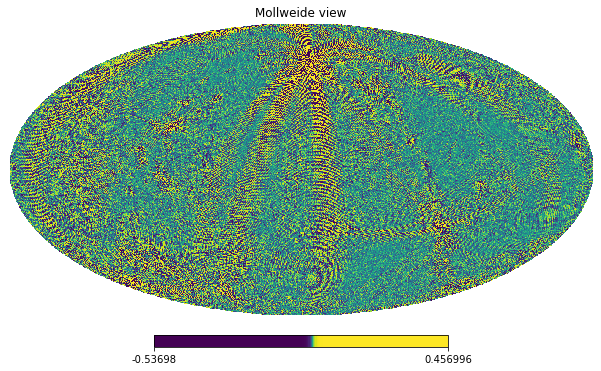

In [18]:
# Uses synthesis to reconstruct the input map. (deu certo?)
f_lm_rec = pys2.synthesis_wav2lm(f_wav, f_scal, B, L, J_min, N, spin, upsample)
f_rec = hp.alm2map(f_lm_rec, nside=nside, lmax=L-1)
hp.mollview((f_ini-f_rec)/(f_ini), norm="hist")

In [24]:
L

768

In [48]:
np.shape(f_lm_rec)

(295296,)